In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17785997749441452359
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2236245607
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16630079858832991933
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   # Create 2 virtual GPUs with 1GB memory each
#   try:
#     tf.config.set_logical_device_configuration(
#         gpus[0],
#         [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
#          tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
#     logical_gpus = tf.config.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     # Virtual devices must be set before GPUs have been initialized
#     print(e)

In [5]:
df = pd.read_csv("labellinggg.csv")
df

,User,Tweet ID,Date Created,Source of Tweet,Tweet,labelling,tweet2
0,restiseptiani27,1.550816e+18,2022-07-23 12:13:33+00:00,Twitter for Android,@BanyuSadewa Untung jarang pake maskapai sekel...,2.0,untung jarang pake maskapai sekelas lcc paling...
1,IndonesiaGaruda,1.541290e+18,2022-06-27 05:18:35+00:00,Socio Enterprise,@CaryantoAwuy Terima kasih atas apresiasi dan ...,2.0,terima kasih atas apresiasi dan dukungan yang ...
2,Iref41089175,1.518136e+18,2022-04-24 07:53:43+00:00,Twitter for Android,@ChusnulCh__ Ya sulit Garuda ..\r\nAneh rugi b...,0.0,ya sulit garuda aneh rugi bgitu besar pdhl ngu...
3,DinaIsmenika,1.533478e+18,2022-06-05 15:57:18+00:00,Twitter for Android,@Citilink baru kali ini pelayanan citilink tid...,0.0,baru kali ini pelayanan citilink tidak memuask...
4,n4byl5,1.538486e+18,2022-06-19 11:35:35+00:00,Twitter for Android,@D_N4bil5 @erickthohir @IndonesiaGaruda semoga...,2.0,semoga pelayanan garuda indonesia lebih baik d...
...,...,...,...,...,...,...,...
7082,BagusCandra,1.578070e+23,2022-10-06 17:17:09+00:00,Twitter for iPhone,@VICE_ID Makin lama merpatinya terbang makin t...,1.0,makin lama merpatinya terbang makin tinggi ila...
7083,IlhamAj89520508,1.578050e+23,2022-10-06 16:02:02+00:00,Twitter for Android,Lion Air JT630\r\nJakarta ( CGK ) - Bengkulu (...,1.0,lion air jakarta cgk bengkulu bks dialihkan ke...
7084,dvns_b,1.578040e+23,2022-10-06 15:21:57+00:00,Twitter for Android,First time ngerasain Lion Air bukannya delay m...,0.0,first time ngerasain lion air bukannya delay m...
7085,KharismaTiket,1.578040e+23,2022-10-06 15:06:17+00:00,twittbot.net,Tiket Pesawat #KharismaTiket 399ribu LIONair |...,1.0,tiket pesawat lionair september pontianak jaka...


Text(0.5, 1.0, 'Sentiment')

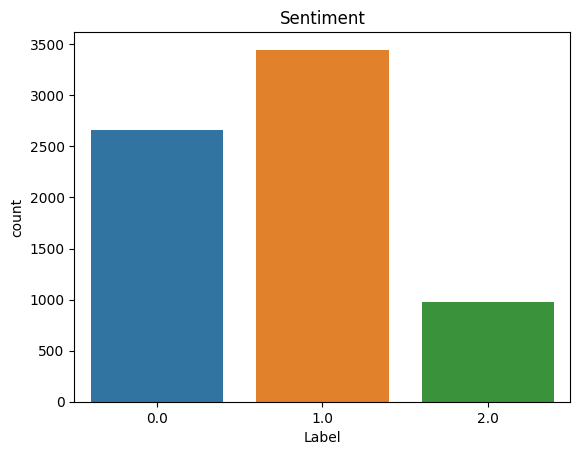

In [6]:
sns.countplot(x = df.labelling)
plt.xlabel('Label')
plt.title('Sentiment')

# Cleaning

In [8]:
import re
import string

def bersih_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub("@[A-Za-z0-9_]+", "", text)  # Menghapus @<name> [mention twitter]
    text = re.sub("#\w+", "", text)
    text = re.sub("\[.*?\]", "", text)
    text = re.sub("https?://\S+|www\.\S+", "", text)
    text = re.sub("<.*?>+", "", text)
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text)
    # text = re.sub('\n', '', text)
    text = re.sub("\w*\d\w*", "", text)
    text = re.sub("\d+", "", text)
    text = re.sub("\s+", " ", text).strip()
    # text = re.sub('\n', '', text) jadi:
    text = text.replace("\n", " ")
    text = " ".join(text.split())
    return text

# Applying the cleaning function
df['tweet2'] = df['Tweet'].apply(lambda x: bersih_text(x))
df.head()

,User,Tweet ID,Date Created,Source of Tweet,Tweet,labelling,tweet2
0,restiseptiani27,1.550816e+18,2022-07-23 12:13:33+00:00,Twitter for Android,@BanyuSadewa Untung jarang pake maskapai sekel...,2.0,untung jarang pake maskapai sekelas lcc paling...
1,IndonesiaGaruda,1.541290e+18,2022-06-27 05:18:35+00:00,Socio Enterprise,@CaryantoAwuy Terima kasih atas apresiasi dan ...,2.0,terima kasih atas apresiasi dan dukungan yang ...
2,Iref41089175,1.518136e+18,2022-04-24 07:53:43+00:00,Twitter for Android,@ChusnulCh__ Ya sulit Garuda ..\r\nAneh rugi b...,0.0,ya sulit garuda aneh rugi bgitu besar pdhl ngu...
3,DinaIsmenika,1.533478e+18,2022-06-05 15:57:18+00:00,Twitter for Android,@Citilink baru kali ini pelayanan citilink tid...,0.0,baru kali ini pelayanan citilink tidak memuask...
4,n4byl5,1.538486e+18,2022-06-19 11:35:35+00:00,Twitter for Android,@D_N4bil5 @erickthohir @IndonesiaGaruda semoga...,2.0,semoga pelayanan garuda indonesia lebih baik d...


In [9]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['cleaned'] = df['tweet2'].swifter.apply(lambda x: stemmer.stem(x))

KeyboardInterrupt: 

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

factory = StopWordRemoverFactory()

stopword = factory.get_stop_words()
stopwords = factory.create_stop_word_remover()

df['cleaned'] = df['cleaned'].apply(lambda x: stopwords.remove(x))

In [ ]:
from nltk import word_tokenize
from nltk.corpus import stopwords

new_stopwords = ['sahabat', 'nomor','yg','jd','klo','pa','bpj','nya','tp','ga','jg','https','co','aja','ya',
                 'gw','kalo','tuh','tau','gk','gak','kalo','amp','gitu','krn','dr','sih','gue','bgt', 'aja','ya','krn','pake','udah','sampe','udah','emang','nggak','gk','udh','kela','bpjskesehatanri','duanya','banget','tdk', 'bpjsmelayani','gotongroyongsemuatertolong','gotongroyongsemuatertolong_jknhadiruntukrakyat','bpjskesehatan_bpjsmelayani'
                 ,'dgn','nih','loh','dpt','yaa','dah','kak','sm','ngga','dg','deh','lho','utk','kali', 'a', 'b',
                 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v','w','x','y','z', 'gua','sya', 'iya', 'ni']

stop_words = stopwords.words('indonesian')
stop_words.extend(new_stopwords)


def removeStopword(str):
    stop_words = stopwords.words('indonesian')
    stop_words.extend(new_stopwords)
    # stop_words = set(stopwords.words('indonesian'))
    word_tokens = word_tokenize(str)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

df['cleaned'] = df['cleaned'].apply(lambda x: removeStopword(x))

In [ ]:
# df.to_csv('labelling.csv', index=False)

# Model

In [7]:
df = pd.read_csv('labelling.csv')
df

,User,Tweet ID,Date Created,Source of Tweet,Tweet,labelling,tweet2,cleaned
0,restiseptiani27,1.550816e+18,2022-07-23 12:13:33+00:00,Twitter for Android,@BanyuSadewa Untung jarang pake maskapai sekel...,2.0,untung jarang pake maskapai sekelas lcc paling...,untung jarang maskapai kelas lcc enak garuda c...
1,IndonesiaGaruda,1.541290e+18,2022-06-27 05:18:35+00:00,Socio Enterprise,@CaryantoAwuy Terima kasih atas apresiasi dan ...,2.0,terima kasih atas apresiasi dan dukungan yang ...,terima kasih apresiasi dukung senantiasa garud...
2,Iref41089175,1.518136e+18,2022-04-24 07:53:43+00:00,Twitter for Android,@ChusnulCh__ Ya sulit Garuda ..\r\nAneh rugi b...,0.0,ya sulit garuda aneh rugi bgitu besar pdhl ngu...,sulit garuda aneh rugi bgitu pdhl nguasain rut...
3,DinaIsmenika,1.533478e+18,2022-06-05 15:57:18+00:00,Twitter for Android,@Citilink baru kali ini pelayanan citilink tid...,0.0,baru kali ini pelayanan citilink tidak memuask...,layan citilink muas khusus check in badara soe...
4,n4byl5,1.538486e+18,2022-06-19 11:35:35+00:00,Twitter for Android,@D_N4bil5 @erickthohir @IndonesiaGaruda semoga...,2.0,semoga pelayanan garuda indonesia lebih baik d...,moga layan garuda indonesia harga tiket saing ...
...,...,...,...,...,...,...,...,...
7082,BagusCandra,1.578070e+23,2022-10-06 17:17:09+00:00,Twitter for iPhone,@VICE_ID Makin lama merpatinya terbang makin t...,1.0,makin lama merpatinya terbang makin tinggi ila...,merpati terbang ilang tabrak lion air
7083,IlhamAj89520508,1.578050e+23,2022-10-06 16:02:02+00:00,Twitter for Android,Lion Air JT630\r\nJakarta ( CGK ) - Bengkulu (...,1.0,lion air jakarta cgk bengkulu bks dialihkan ke...,lion air jakarta cgk bengkulu bks alih jakarta...
7084,dvns_b,1.578040e+23,2022-10-06 15:21:57+00:00,Twitter for Android,First time ngerasain Lion Air bukannya delay m...,0.0,first time ngerasain lion air bukannya delay m...,first time ngerasain lion air delay dimajuin b...
7085,KharismaTiket,1.578040e+23,2022-10-06 15:06:17+00:00,twittbot.net,Tiket Pesawat #KharismaTiket 399ribu LIONair |...,1.0,tiket pesawat lionair september pontianak jaka...,tiket pesawat lionair september pontianak jaka...


In [11]:
sentences = df['cleaned'].tolist()
labels = df['labelling'].tolist()

df

,User,Tweet ID,Date Created,Source of Tweet,Tweet,labelling,tweet2,cleaned
0,restiseptiani27,1.550816e+18,2022-07-23 12:13:33+00:00,Twitter for Android,@BanyuSadewa Untung jarang pake maskapai sekel...,2.0,untung jarang pake maskapai sekelas lcc paling...,untung jarang maskapai kelas lcc enak garuda c...
1,IndonesiaGaruda,1.541290e+18,2022-06-27 05:18:35+00:00,Socio Enterprise,@CaryantoAwuy Terima kasih atas apresiasi dan ...,2.0,terima kasih atas apresiasi dan dukungan yang ...,terima kasih apresiasi dukung senantiasa garud...
2,Iref41089175,1.518136e+18,2022-04-24 07:53:43+00:00,Twitter for Android,@ChusnulCh__ Ya sulit Garuda ..\r\nAneh rugi b...,0.0,ya sulit garuda aneh rugi bgitu besar pdhl ngu...,sulit garuda aneh rugi bgitu pdhl nguasain rut...
3,DinaIsmenika,1.533478e+18,2022-06-05 15:57:18+00:00,Twitter for Android,@Citilink baru kali ini pelayanan citilink tid...,0.0,baru kali ini pelayanan citilink tidak memuask...,layan citilink muas khusus check in badara soe...
4,n4byl5,1.538486e+18,2022-06-19 11:35:35+00:00,Twitter for Android,@D_N4bil5 @erickthohir @IndonesiaGaruda semoga...,2.0,semoga pelayanan garuda indonesia lebih baik d...,moga layan garuda indonesia harga tiket saing ...
...,...,...,...,...,...,...,...,...
7082,BagusCandra,1.578070e+23,2022-10-06 17:17:09+00:00,Twitter for iPhone,@VICE_ID Makin lama merpatinya terbang makin t...,1.0,makin lama merpatinya terbang makin tinggi ila...,merpati terbang ilang tabrak lion air
7083,IlhamAj89520508,1.578050e+23,2022-10-06 16:02:02+00:00,Twitter for Android,Lion Air JT630\r\nJakarta ( CGK ) - Bengkulu (...,1.0,lion air jakarta cgk bengkulu bks dialihkan ke...,lion air jakarta cgk bengkulu bks alih jakarta...
7084,dvns_b,1.578040e+23,2022-10-06 15:21:57+00:00,Twitter for Android,First time ngerasain Lion Air bukannya delay m...,0.0,first time ngerasain lion air bukannya delay m...,first time ngerasain lion air delay dimajuin b...
7085,KharismaTiket,1.578040e+23,2022-10-06 15:06:17+00:00,twittbot.net,Tiket Pesawat #KharismaTiket 399ribu LIONair |...,1.0,tiket pesawat lionair september pontianak jaka...,tiket pesawat lionair september pontianak jaka...


In [12]:
for x in range(2):
  print(sentences[x])
  print(labels[x])
  print("\n")

untung jarang maskapai kelas lcc enak garuda citilink best layan anti bangettt lcc
2.0


terima kasih apresiasi dukung senantiasa garuda indonesia upaya maksimal layan langgan garuda indonesia lea
2.0




In [13]:
from keras.preprocessing.text import Tokenizer

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 1000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50
# This is fixed.
EMBEDDING_DIM = 16

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Tweet'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 22037 unique tokens.


In [14]:
X = tokenizer.texts_to_sequences(df['Tweet'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Y = pd.get_dummies(df['labelling']).values
print('Shape of label tensor:', Y.shape)

Shape of data tensor: (7087, 50)
Shape of label tensor: (7087, 3)


In [15]:
# !pip install imblearn
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(sampling_strategy = 'not majority')
X_resO, y_resOV = rus.fit_resample(X,Y)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_resO,y_resOV, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(8272, 50) (8272, 3)
(2069, 50) (2069, 3)


In [17]:
embedding_dim = 16
vocab_size = 1000
max_length = 50


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, 
                                                       return_sequences=True)), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            16000     
                                                                 
 bidirectional (Bidirectiona  (None, 50, 32)           4224      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 198       
                                                                 
 dense_1 (Dense)             (None, 3)                 21        
                                                                 
Total params: 26,715
Trainable params: 26,715
Non-traina

In [18]:
num_epochs = 30
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=num_epochs, validation_data=(X_test, Y_test))

Epoch 1/30
259/259 [==============================] - 18s 41ms/step - loss: 1.0987 - accuracy: 0.3251 - val_loss: 1.0989 - val_accuracy: 0.3185
Epoch 2/30
259/259 [==============================] - 8s 31ms/step - loss: 1.0987 - accuracy: 0.3323 - val_loss: 1.0989 - val_accuracy: 0.3185
Epoch 3/30
259/259 [==============================] - 7s 28ms/step - loss: 1.0987 - accuracy: 0.3274 - val_loss: 1.0991 - val_accuracy: 0.3185
Epoch 4/30
259/259 [==============================] - 8s 31ms/step - loss: 1.0987 - accuracy: 0.3323 - val_loss: 1.0990 - val_accuracy: 0.3185
Epoch 5/30
259/259 [==============================] - 7s 27ms/step - loss: 1.0987 - accuracy: 0.3370 - val_loss: 1.0989 - val_accuracy: 0.3185
Epoch 6/30
259/259 [==============================] - 7s 27ms/step - loss: 1.0987 - accuracy: 0.3370 - val_loss: 1.0989 - val_accuracy: 0.3185
Epoch 7/30
259/259 [==============================] - 7s 26ms/step - loss: 1.0987 - accuracy: 0.3370 - val_loss: 1.0988 - val_accuracy: 0.318

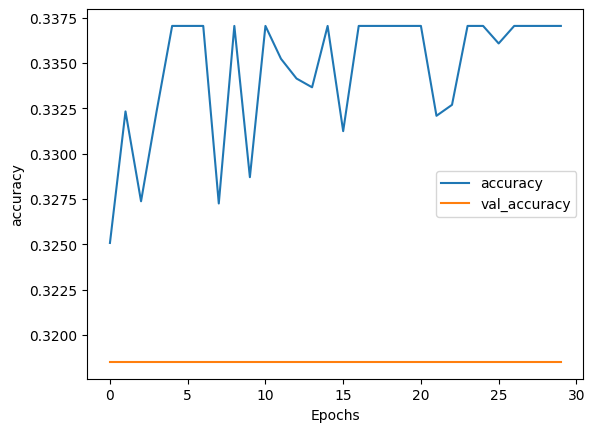

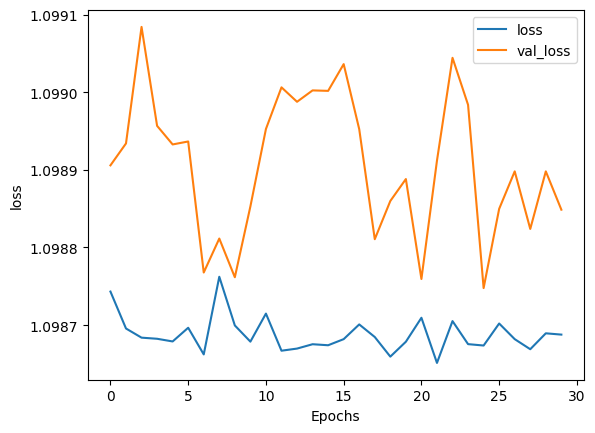

In [19]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# LDA

In [8]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

import pandas as pd

In [9]:
df = pd.read_csv('labelling.csv')
df

,User,Tweet ID,Date Created,Source of Tweet,Tweet,labelling,tweet2,cleaned
0,restiseptiani27,1.550816e+18,2022-07-23 12:13:33+00:00,Twitter for Android,@BanyuSadewa Untung jarang pake maskapai sekel...,2.0,untung jarang pake maskapai sekelas lcc paling...,untung jarang maskapai kelas lcc enak garuda c...
1,IndonesiaGaruda,1.541290e+18,2022-06-27 05:18:35+00:00,Socio Enterprise,@CaryantoAwuy Terima kasih atas apresiasi dan ...,2.0,terima kasih atas apresiasi dan dukungan yang ...,terima kasih apresiasi dukung senantiasa garud...
2,Iref41089175,1.518136e+18,2022-04-24 07:53:43+00:00,Twitter for Android,@ChusnulCh__ Ya sulit Garuda ..\r\nAneh rugi b...,0.0,ya sulit garuda aneh rugi bgitu besar pdhl ngu...,sulit garuda aneh rugi bgitu pdhl nguasain rut...
3,DinaIsmenika,1.533478e+18,2022-06-05 15:57:18+00:00,Twitter for Android,@Citilink baru kali ini pelayanan citilink tid...,0.0,baru kali ini pelayanan citilink tidak memuask...,layan citilink muas khusus check in badara soe...
4,n4byl5,1.538486e+18,2022-06-19 11:35:35+00:00,Twitter for Android,@D_N4bil5 @erickthohir @IndonesiaGaruda semoga...,2.0,semoga pelayanan garuda indonesia lebih baik d...,moga layan garuda indonesia harga tiket saing ...
...,...,...,...,...,...,...,...,...
7082,BagusCandra,1.578070e+23,2022-10-06 17:17:09+00:00,Twitter for iPhone,@VICE_ID Makin lama merpatinya terbang makin t...,1.0,makin lama merpatinya terbang makin tinggi ila...,merpati terbang ilang tabrak lion air
7083,IlhamAj89520508,1.578050e+23,2022-10-06 16:02:02+00:00,Twitter for Android,Lion Air JT630\r\nJakarta ( CGK ) - Bengkulu (...,1.0,lion air jakarta cgk bengkulu bks dialihkan ke...,lion air jakarta cgk bengkulu bks alih jakarta...
7084,dvns_b,1.578040e+23,2022-10-06 15:21:57+00:00,Twitter for Android,First time ngerasain Lion Air bukannya delay m...,0.0,first time ngerasain lion air bukannya delay m...,first time ngerasain lion air delay dimajuin b...
7085,KharismaTiket,1.578040e+23,2022-10-06 15:06:17+00:00,twittbot.net,Tiket Pesawat #KharismaTiket 399ribu LIONair |...,1.0,tiket pesawat lionair september pontianak jaka...,tiket pesawat lionair september pontianak jaka...


In [10]:
df.dropna(inplace=True)

In [11]:
positif = df[(df['labelling'] == 2.0)]
negatif = df[(df['labelling'] == 0.0)]
netral = df[(df['labelling'] == 1.0)]

# Negatif

In [12]:
negatif

,User,Tweet ID,Date Created,Source of Tweet,Tweet,labelling,tweet2,cleaned
2,Iref41089175,1.518136e+18,2022-04-24 07:53:43+00:00,Twitter for Android,@ChusnulCh__ Ya sulit Garuda ..\r\nAneh rugi b...,0.0,ya sulit garuda aneh rugi bgitu besar pdhl ngu...,sulit garuda aneh rugi bgitu pdhl nguasain rut...
3,DinaIsmenika,1.533478e+18,2022-06-05 15:57:18+00:00,Twitter for Android,@Citilink baru kali ini pelayanan citilink tid...,0.0,baru kali ini pelayanan citilink tidak memuask...,layan citilink muas khusus check in badara soe...
6,ronalfernandos7,1.523710e+18,2022-05-09 17:01:33+00:00,Twitter for Android,@GarudaCares @sashymymahal Geblek emang garuda...,0.0,geblek emang garuda udah ga profit pelayanan j...,geblek garuda profit layan jelek hdeh
7,cumlaudejobless,1.523629e+18,2022-05-09 11:39:39+00:00,Twitter for iPhone,@GarudaCares @sashymymahal Halah lo jg kmrin b...,0.0,halah lo jg kmrin bikin schedule gue berantaka...,halah lo kmrin bikin schedule beranta gada gan...
8,omnyaponakan,1.523603e+18,2022-05-09 09:55:34+00:00,Twitter for Android,@GarudaCares @sashymymahal Sepertinya hal kek ...,0.0,sepertinya hal kek gini kedepannya gabakal kej...,kek gin gabakal mba keburu kapok layan garuda ...
...,...,...,...,...,...,...,...,...
7066,rahastitika,1.578310e+23,2022-10-07 09:16:08+00:00,Twitter for iPhone,@fifachazali @agoda Yg pernah cancel tiba2 ada...,0.0,yg pernah cancel adalah less than hour filght ...,cancel less than hour filght cancel cari terba...
7073,lpriyambada,1.578220e+23,2022-10-07 03:08:26+00:00,Twitter for Android,@lion air apakah web check in nya bermasalah.....,0.0,air apakah web check in nya bermasalaherror,air web check in bermasalaherror
7077,ayuhayon,1.578190e+23,2022-10-07 01:06:17+00:00,Twitter for iPhone,Telp call centre @BatikAirINA @LionAirID nungg...,0.0,telp call centre nunggu smpai nunggu keputus… ...,telp call centre nunggu smpai nunggu putus tlp...
7081,cherloooo,1.578080e+23,2022-10-06 17:30:51+00:00,Twitter Web App,Ya Allah Lion air suka banget cancel2 jadwal..,0.0,ya allah lion air suka banget jadwal,allah lion air suka jadwal


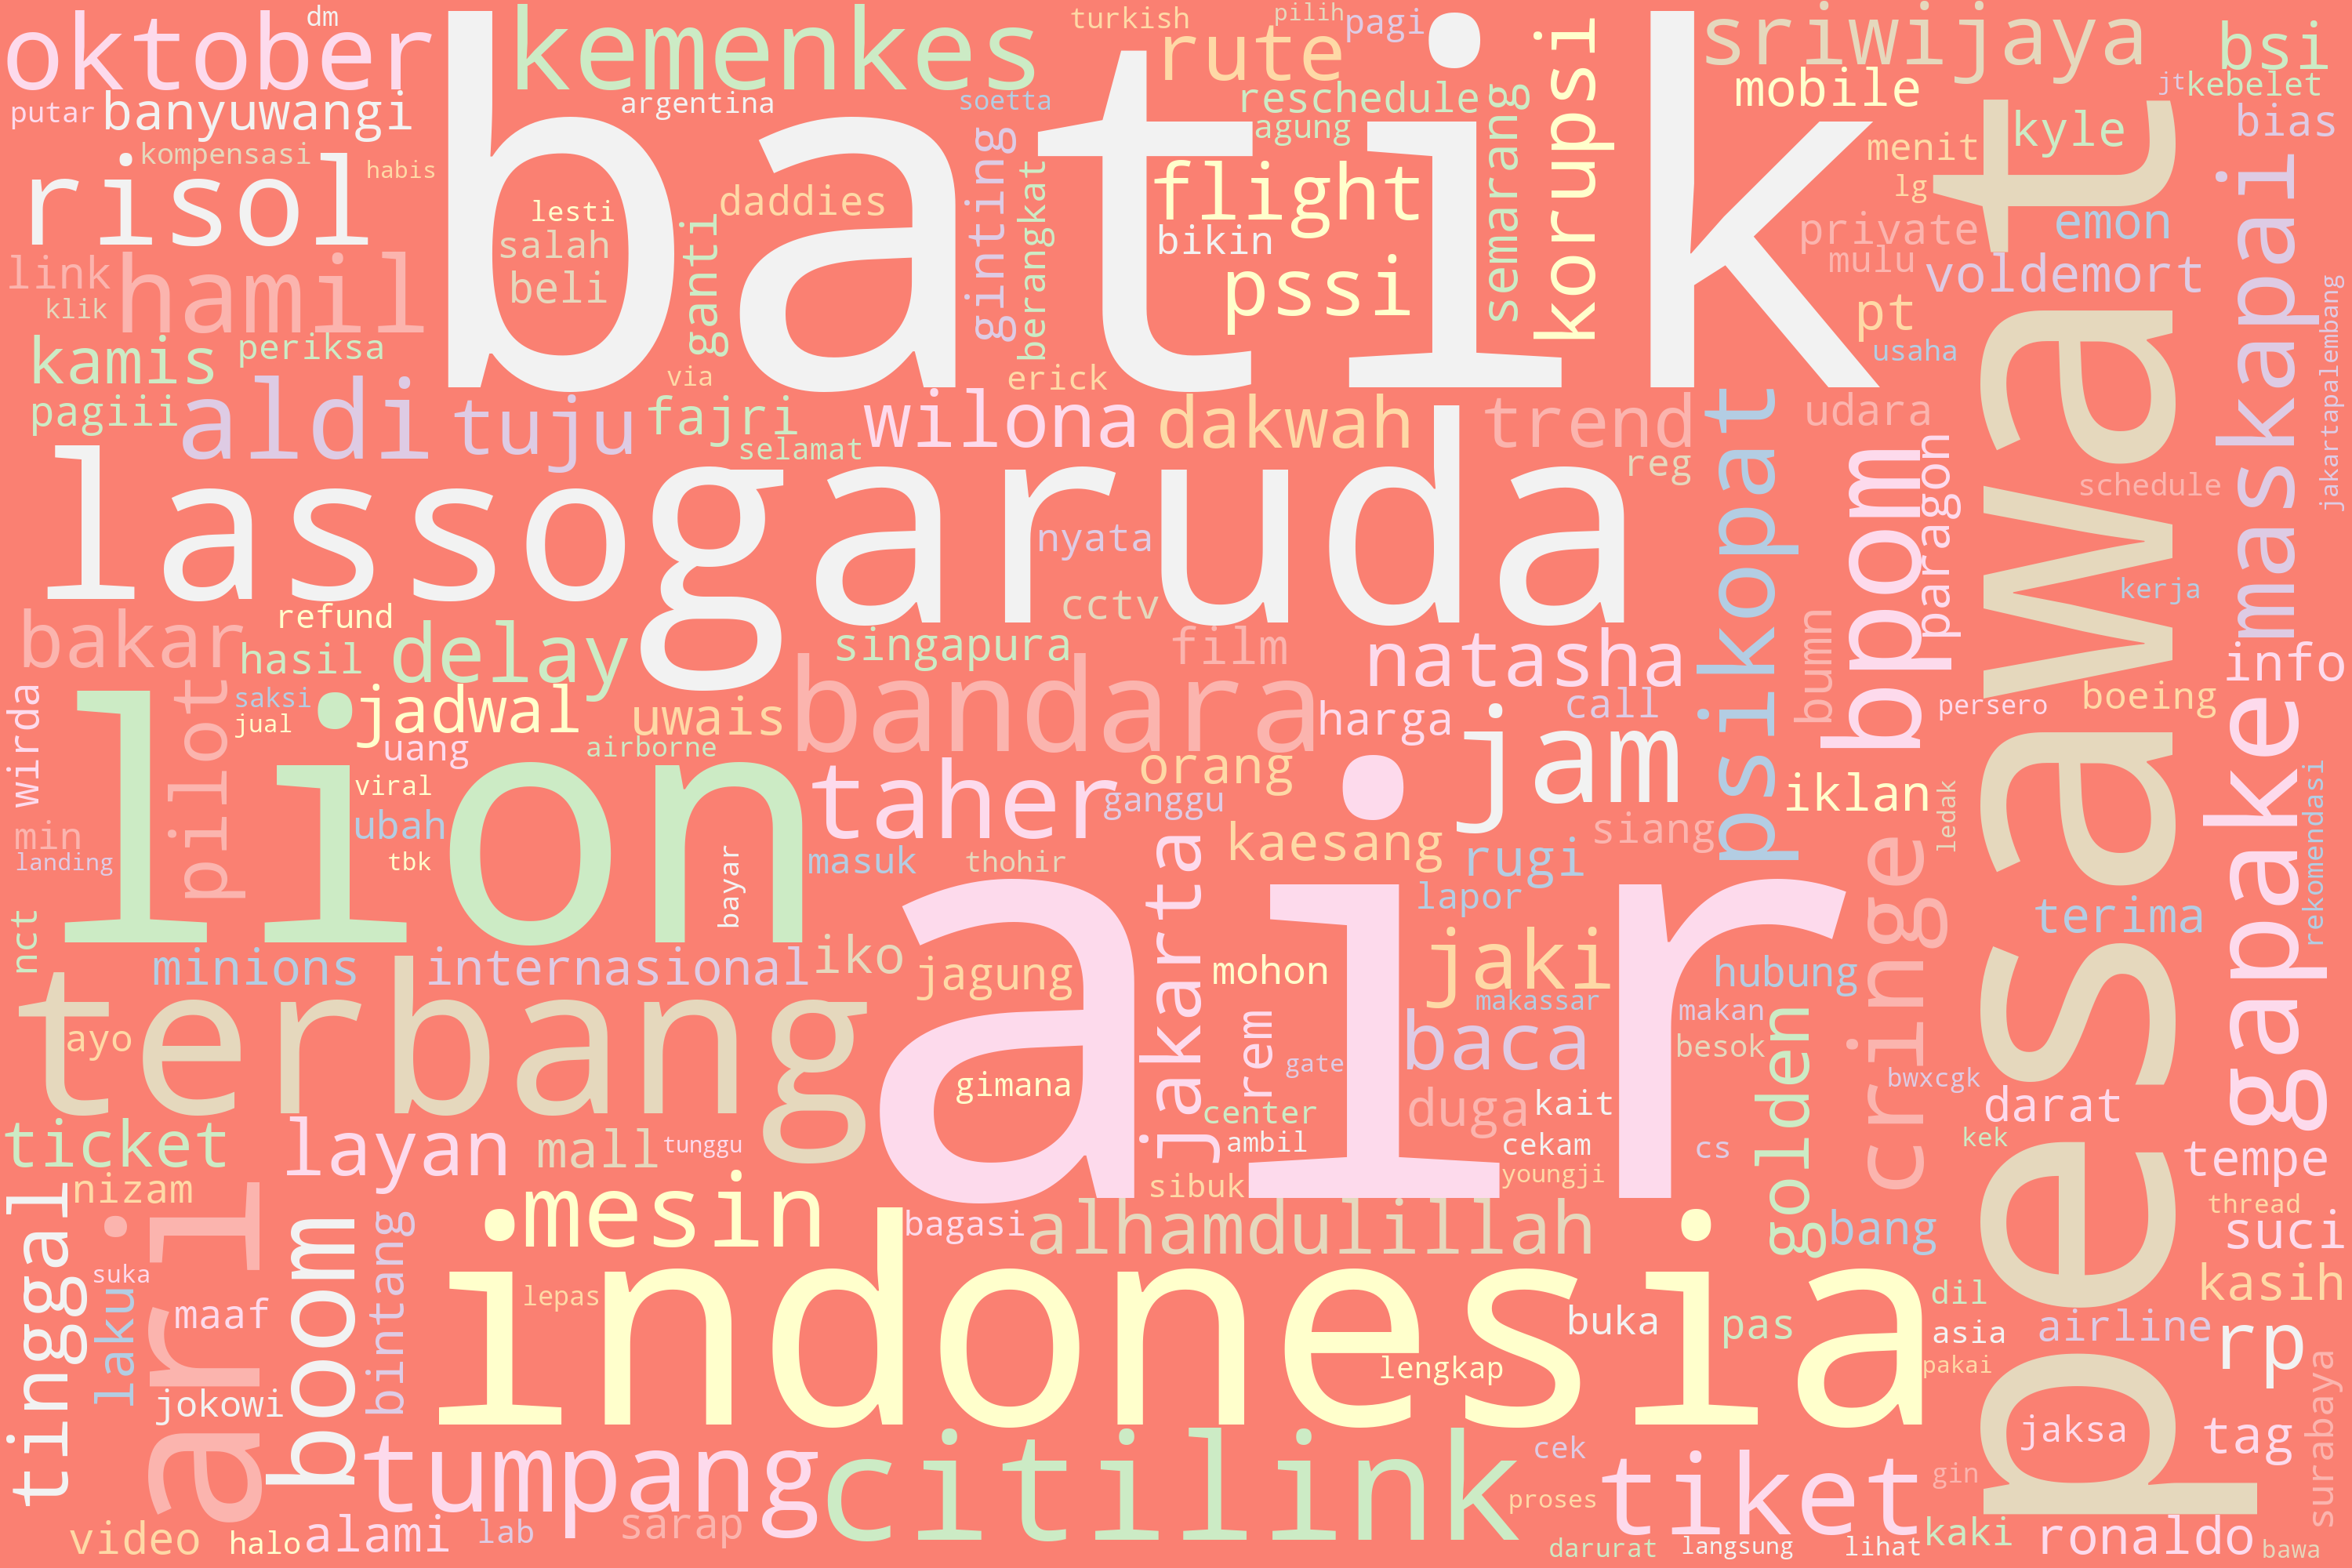

In [13]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(map(str, list(negatif['cleaned'].values)))
# Create a WordCloud object
word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        ).generate(long_string)

# Visualize the word cloud
word_cloud.to_image()

In [14]:
text = negatif.cleaned
text_list =  [i.split() for i in text]
print(len(text_list))
# print(text_list)

2651


In [15]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary<1053 unique tokens: ['aneh', 'bumn', 'garuda', 'jabat', 'jual']...>


In [16]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

2651
[(1, 1), (2, 1), (51, 1), (167, 1), (230, 1), (270, 1), (300, 1), (317, 1), (331, 2), (332, 1), (333, 1), (334, 1), (335, 1)]


In [17]:
# from gensim.models.coherencemodel import CoherenceModel
# from gensim.models.ldamodel import LdaModel
# from gensim.corpora.dictionary import Dictionary
# from numpy import array
# #function to compute coherence values
# def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
#     coherence_values = []
#     model_list = []
#     for num_topics in range(start, limit, step):
#         model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
#         model_list.append(model)
#         coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
#         coherence_values.append(coherencemodel.get_coherence())
        
#     return model_list, coherence_values

In [18]:
# start=1
# limit=40
# step=1
# model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
#                                                         texts=text_list, start=start, limit=limit, step=step)
# #show graphs
# import matplotlib.pyplot as plt
# x = range(start, limit, step)
# plt.plot(x, coherence_values)
# plt.xlabel("Num Topics")
# plt.ylabel("Coherence score")
# plt.legend(("coherence_values"), loc='best')
# plt.show()

In [19]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=5) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.021*"lion" + 0.015*"pesawat" + 0.015*"jt" + 0.014*"tumpang" + 0.013*"bakar" + 0.013*"darurat" + 0.010*"patah" + 0.010*"mesin" + 0.010*"api" + 0.009*"darat"
Topic: 1 Word: 0.017*"mulu" + 0.015*"lion" + 0.014*"ledak" + 0.011*"enak" + 0.010*"terbang" + 0.009*"kek" + 0.008*"sabar" + 0.008*"maaf" + 0.008*"kayak" + 0.008*"parah"
Topic: 2 Word: 0.018*"lion" + 0.011*"pesawat" + 0.010*"terbang" + 0.010*"citilink" + 0.009*"bandara" + 0.007*"lionair" + 0.007*"situasi" + 0.007*"tinggal" + 0.007*"singa" + 0.007*"ari"
Topic: 3 Word: 0.067*"lion" + 0.021*"mesin" + 0.018*"sriwijaya" + 0.013*"call" + 0.013*"jam" + 0.013*"bakar" + 0.013*"pesawat" + 0.012*"center" + 0.012*"putar" + 0.011*"sibuk"
Topic: 4 Word: 0.033*"lion" + 0.025*"pesawat" + 0.020*"delay" + 0.016*"tumpang" + 0.016*"mesin" + 0.015*"pilot" + 0.014*"bakar" + 0.012*"terbang" + 0.011*"jam" + 0.010*"cekam"


In [20]:
model.save("lda_model")

In [21]:
# import pyLDAvis.gensim_models

# pyLDAvis.enable_notebook()

# data = pyLDAvis.gensim_models.prepare(model, corpus_tfidf, dictionary)
# print(data)
# pyLDAvis.save_html(data, 'lda-gensim3.html')

# Positif

In [33]:
positif

,User,Tweet ID,Date Created,Source of Tweet,Tweet,labelling,tweet2,cleaned
0,restiseptiani27,1.550816e+18,2022-07-23 12:13:33+00:00,Twitter for Android,@BanyuSadewa Untung jarang pake maskapai sekel...,2.0,untung jarang pake maskapai sekelas lcc paling...,untung jarang maskapai kelas lcc enak garuda c...
1,IndonesiaGaruda,1.541290e+18,2022-06-27 05:18:35+00:00,Socio Enterprise,@CaryantoAwuy Terima kasih atas apresiasi dan ...,2.0,terima kasih atas apresiasi dan dukungan yang ...,terima kasih apresiasi dukung senantiasa garud...
4,n4byl5,1.538486e+18,2022-06-19 11:35:35+00:00,Twitter for Android,@D_N4bil5 @erickthohir @IndonesiaGaruda semoga...,2.0,semoga pelayanan garuda indonesia lebih baik d...,moga layan garuda indonesia harga tiket saing ...
12,ok_harry,1.537974e+18,2022-06-18 01:41:33+00:00,Twitter Web App,@IndonesiaGaruda Apakah senyaman ini pelayanan...,2.0,apakah senyaman ini pelayanan bumn kelas dunia...,nyaman layan bumn kelas dunia garuda indonesia
13,QiqiBibeh,1.554657e+18,2022-08-03 02:34:22+00:00,Twitter for iPhone,@IndonesiaGaruda Terima kasih atas respon cepa...,2.0,terima kasih atas respon cepatnya semoga pelay...,terima kasih respon cepat moga layan ramah peg...
...,...,...,...,...,...,...,...,...
6725,ethaskate,1.582800e+22,2022-10-19 18:21:50+00:00,Twitter for iPhone,Makannya kl ak flight prefer lion aja deh. Mur...,2.0,makannya kl ak flight prefer lion aja deh mura...,makan kl ak flight prefer lion murah kl delay ...
6733,kejumartabak,1.582730e+23,2022-10-19 13:50:22+00:00,Twitter for Android,@eibcdkfghijk apaaa tuuhhh??? kemarin aku cek ...,2.0,apaaa tuuhhh kemarin aku cek yg buat hitc pali...,apaaa tuuhhh kemarin cek hitc murah lion air
6742,hellofu1999,1.582630e+23,2022-10-19 06:56:58+00:00,Twitter for iPhone,Dapet email cancelled dari lion air langsung c...,2.0,dapet email cancelled dari lion air langsung c...,dapet email cancelled lion air langsung cepet ...
7040,FaridhaAulia1,1.578820e+23,2022-10-08 18:42:53+00:00,Twitter for Android,@jedmosely @cakalangsuir @AKrowid @mglbr Seben...,2.0,sebenernya menurutku aga kurang masuk bandinga...,sebenernya aga masuk banding lion air walopun ...


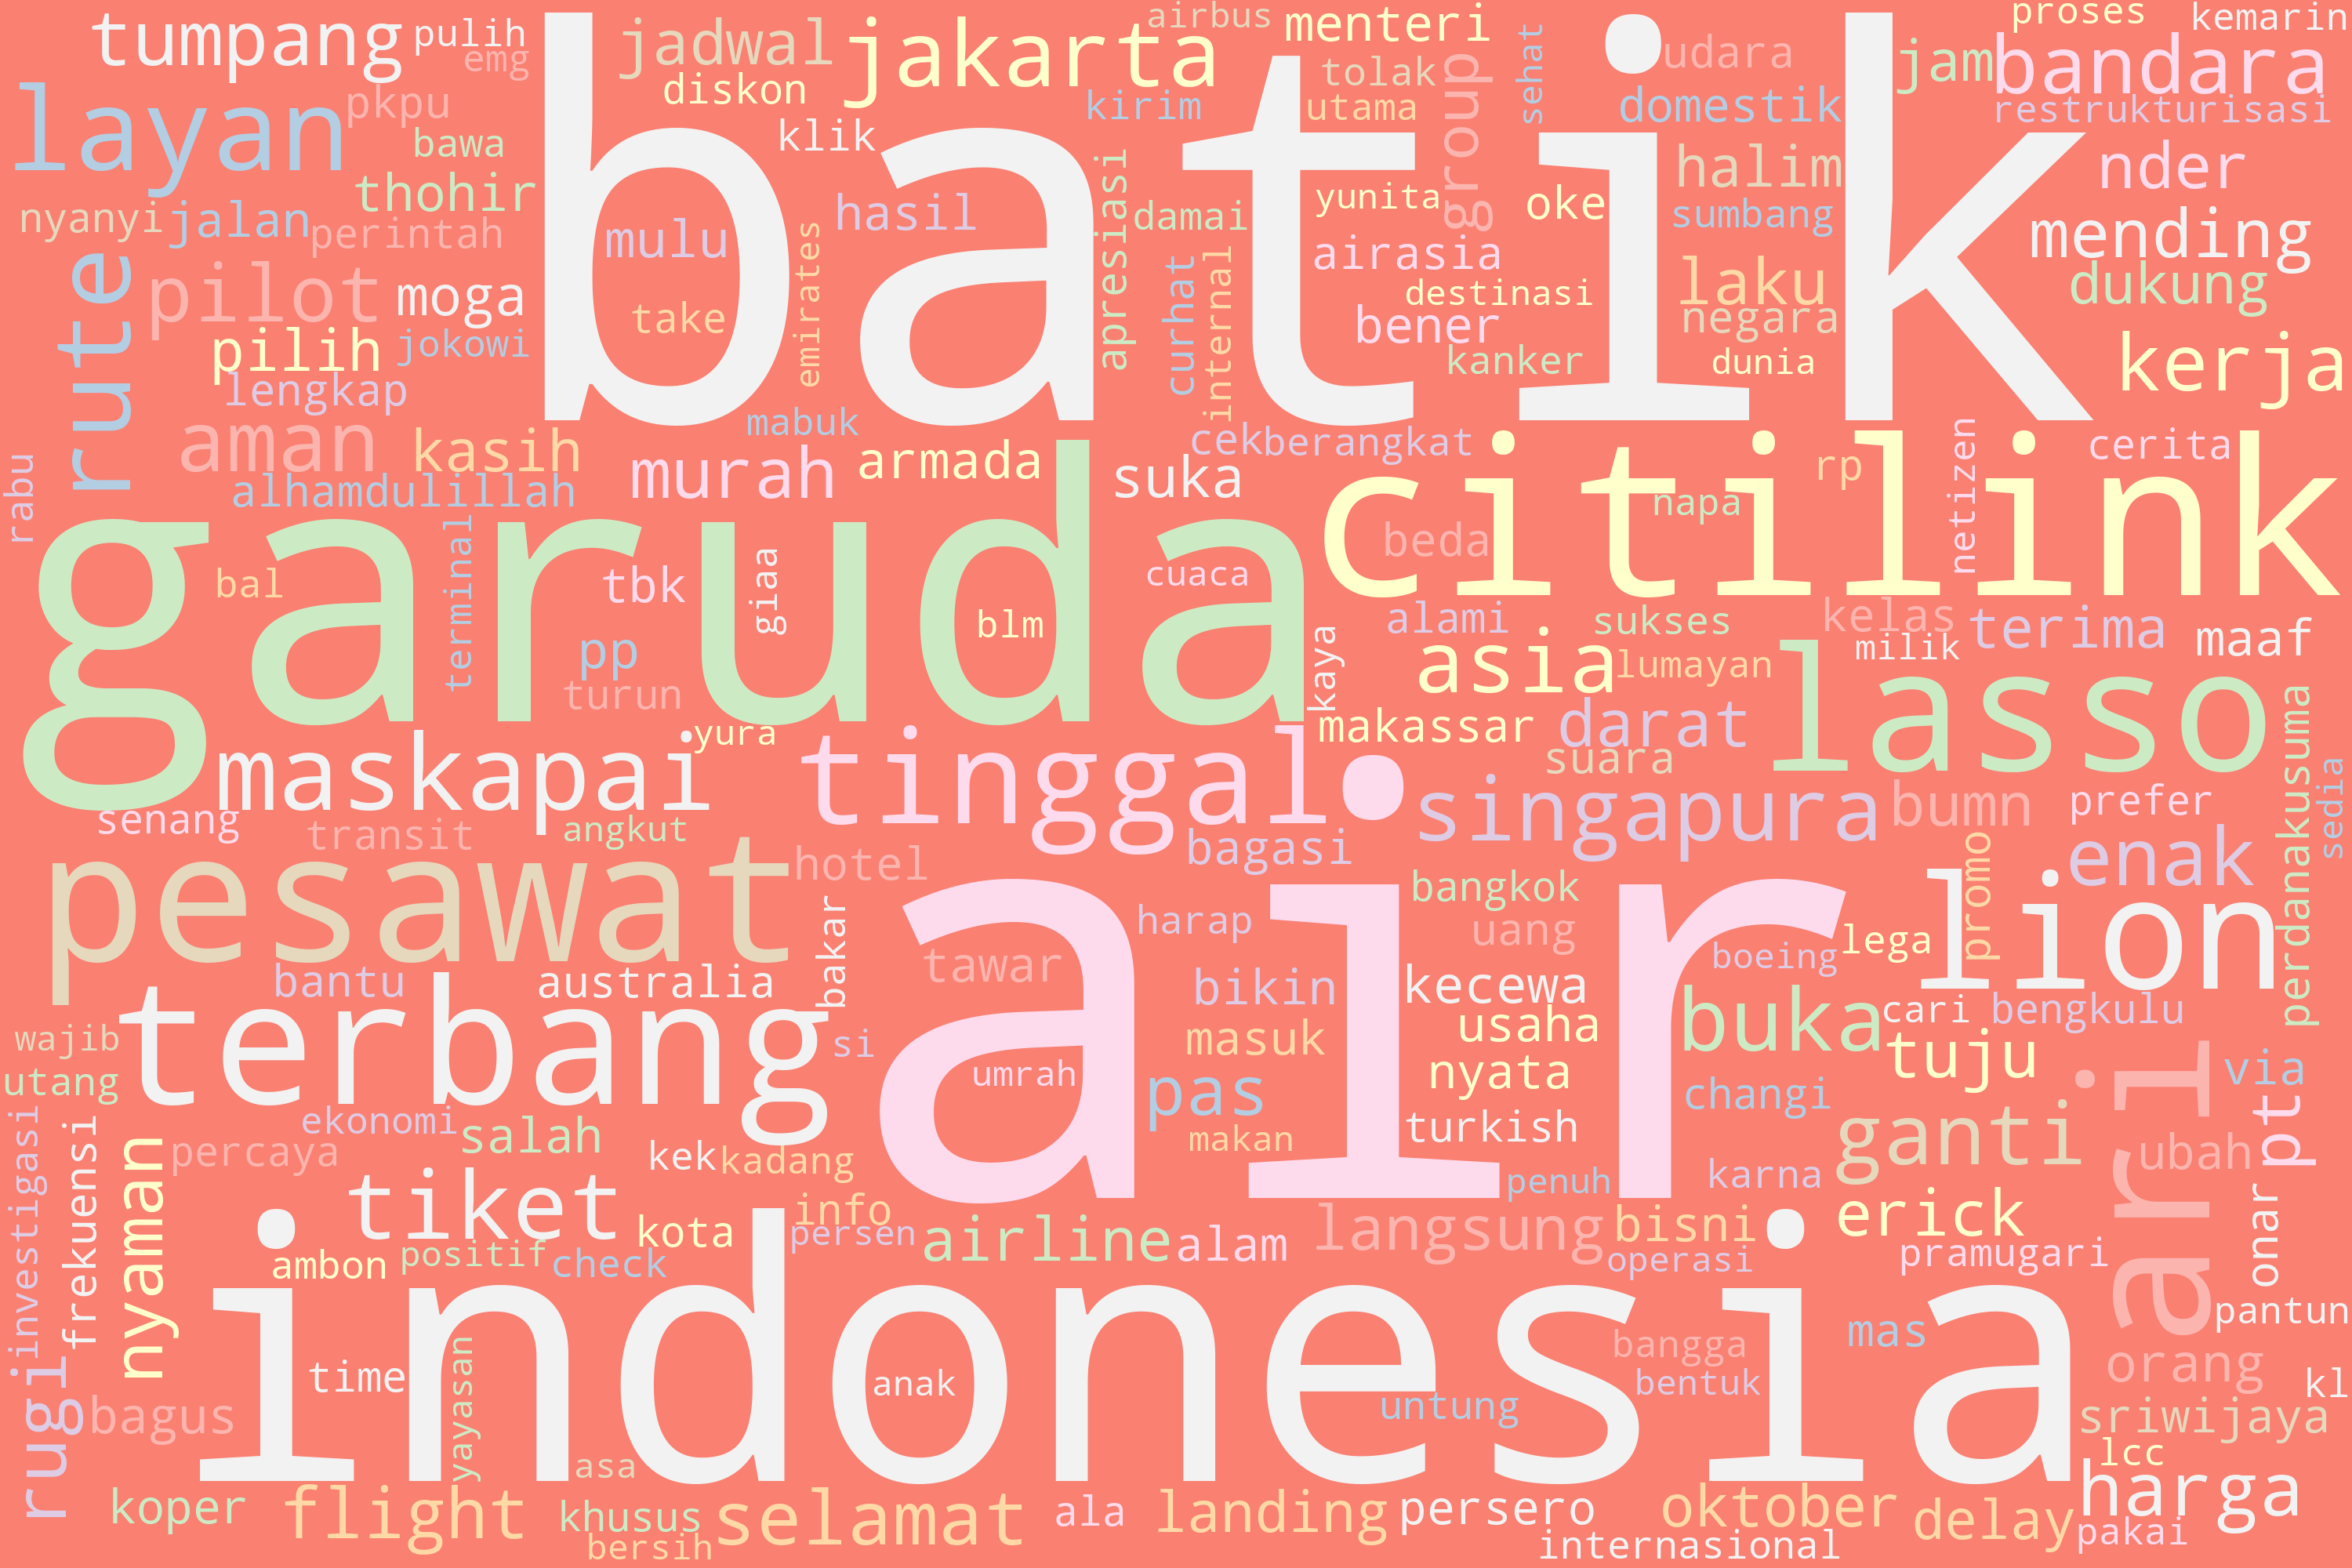

In [27]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(map(str, list(positif['cleaned'].values)))
# Create a WordCloud object
word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        ).generate(long_string)

# Visualize the word cloud
word_cloud.to_image()

In [28]:
text = positif.cleaned
text_list =  [i.split() for i in text]
print(len(text_list))
# print(text_list)

980


In [29]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary<355 unique tokens: ['best', 'enak', 'jarang', 'kelas', 'layan']...>


In [30]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

980
[(139, 1), (140, 1), (167, 1)]


In [31]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=5) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.018*"tinggal" + 0.017*"ari" + 0.017*"lasso" + 0.016*"enak" + 0.016*"kecewa" + 0.016*"layan" + 0.014*"terbang" + 0.013*"pesawat" + 0.012*"rute" + 0.012*"maskapai"
Topic: 1 Word: 0.024*"terbang" + 0.019*"pesawat" + 0.014*"rute" + 0.013*"lion" + 0.013*"selamat" + 0.012*"buka" + 0.011*"tuju" + 0.010*"bener" + 0.010*"cerita" + 0.009*"pilih"
Topic: 2 Word: 0.029*"ari" + 0.029*"lion" + 0.028*"lasso" + 0.024*"pesawat" + 0.023*"tinggal" + 0.021*"terbang" + 0.017*"enak" + 0.016*"singapura" + 0.012*"maskapai" + 0.012*"kerja"
Topic: 3 Word: 0.021*"asia" + 0.017*"lasso" + 0.017*"ari" + 0.015*"ganti" + 0.015*"lion" + 0.014*"pesawat" + 0.013*"nder" + 0.012*"aman" + 0.012*"terbang" + 0.012*"tiket"
Topic: 4 Word: 0.019*"tumpang" + 0.019*"pesawat" + 0.017*"ari" + 0.016*"lasso" + 0.015*"jakarta" + 0.014*"tinggal" + 0.014*"terbang" + 0.014*"buka" + 0.014*"rute" + 0.014*"bandara"


In [32]:
model.save("poslda_model")

# Netral

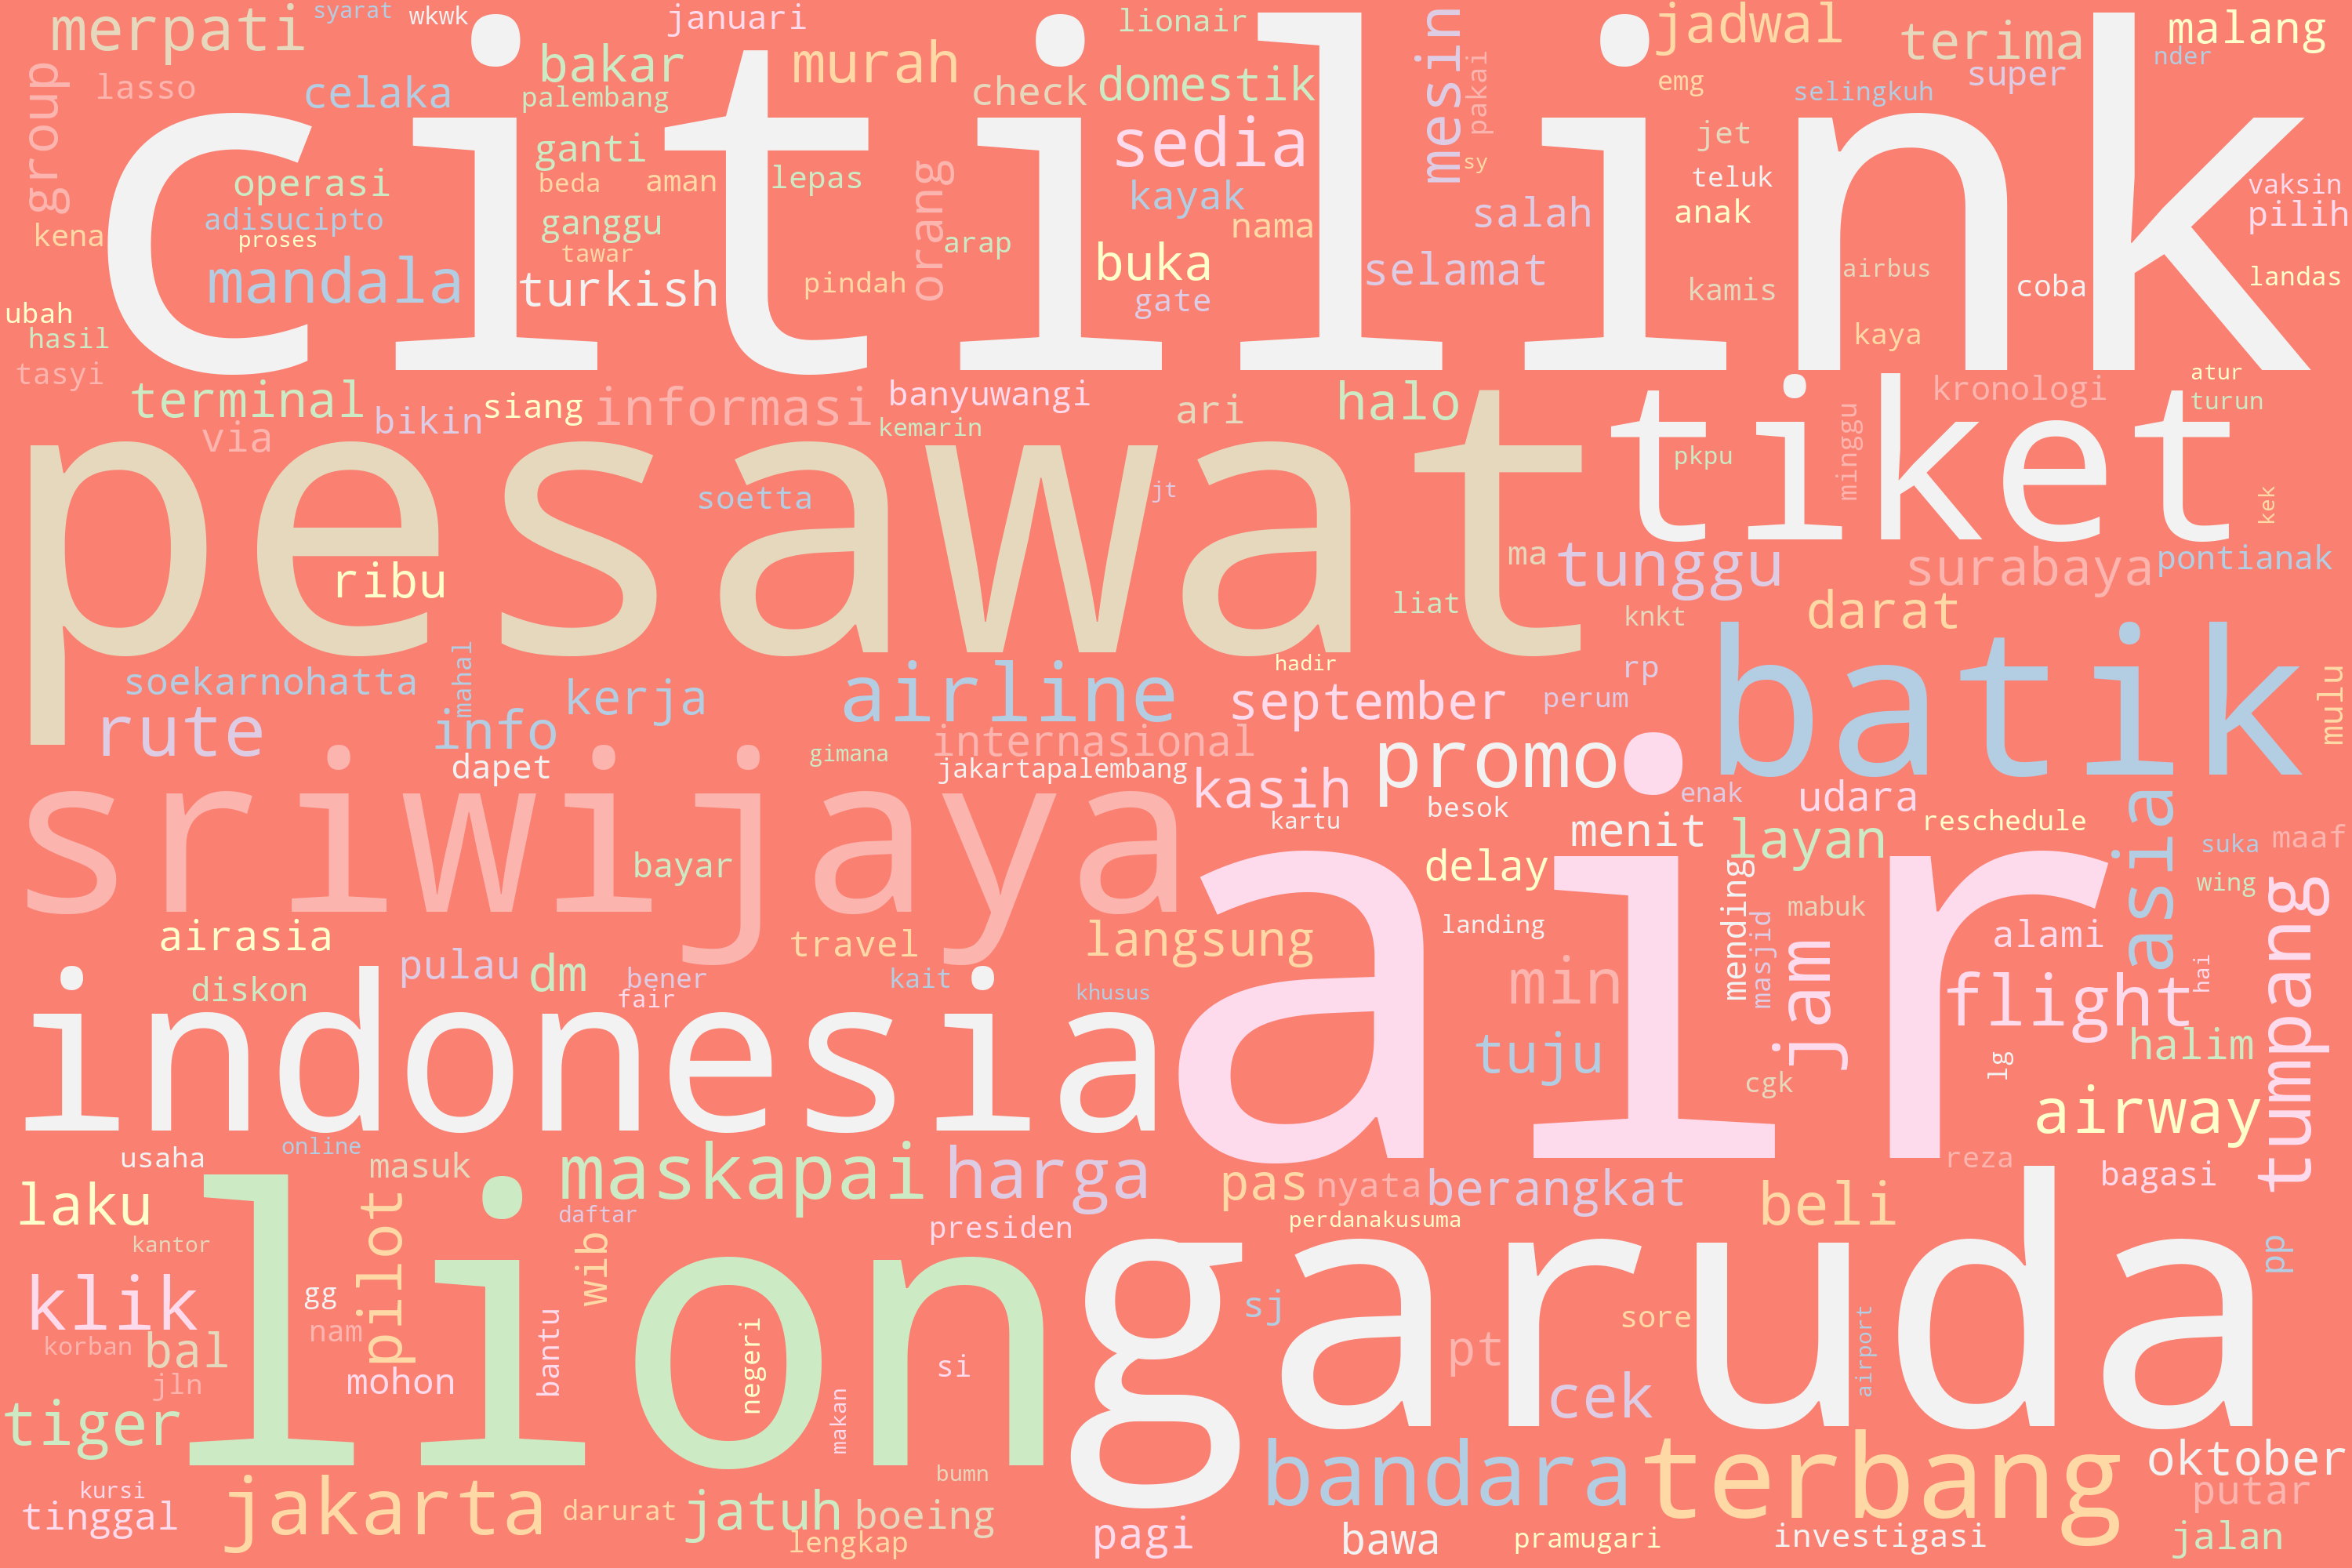

In [49]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(map(str, list(netral['cleaned'].values)))
# Create a WordCloud object
word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        ).generate(long_string)

# Visualize the word cloud
word_cloud.to_image()

In [50]:
text = netral.cleaned
text_list =  [i.split() for i in text]
print(len(text_list))
# print(text_list)

3442


In [51]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary<1041 unique tokens: ['doa', 'dukung', 'garuda', 'indonesia', 'layan']...>


In [52]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

3442
[(2, 1), (3, 1), (24, 1), (112, 1), (151, 1), (257, 1), (353, 1), (354, 1)]


In [53]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=5) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.056*"sriwijaya" + 0.024*"promo" + 0.020*"bakar" + 0.019*"asia" + 0.018*"tiket" + 0.017*"merpati" + 0.017*"sedia" + 0.016*"mandala" + 0.016*"tiger" + 0.016*"airlines"
Topic: 1 Word: 0.029*"klik" + 0.024*"tiket" + 0.023*"sriwijaya" + 0.021*"jakarta" + 0.018*"malang" + 0.015*"murah" + 0.014*"celaka" + 0.014*"dm" + 0.013*"cek" + 0.013*"harga"
Topic: 2 Word: 0.032*"jatuh" + 0.017*"bandara" + 0.014*"terbang" + 0.012*"halim" + 0.012*"soetta" + 0.012*"in" + 0.011*"putar" + 0.009*"batik" + 0.008*"tumpang" + 0.007*"sriwijaya"
Topic: 3 Word: 0.016*"pilot" + 0.016*"sriwijaya" + 0.015*"daftar" + 0.013*"tumpang" + 0.011*"turkish" + 0.011*"semarangsurabaya" + 0.011*"tiket" + 0.010*"now" + 0.010*"is" + 0.010*"harga"
Topic: 4 Word: 0.021*"garuda" + 0.019*"indonesia" + 0.018*"sriwijaya" + 0.016*"terbang" + 0.011*"lionair" + 0.010*"no" + 0.009*"batik" + 0.009*"nama" + 0.008*"tumpang" + 0.008*"alami"


In [54]:
model.save("netlda_model")